# Extract Transform Load

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/datavidia2019/flight.csv
/kaggle/input/datavidia2019/sample_submission.csv
/kaggle/input/datavidia2019/Data Dictionary.pdf
/kaggle/input/datavidia2019/hotel.csv
/kaggle/input/datavidia2019/test.csv


**Importing Dataset**

In [2]:
pesawat=pd.read_csv('../input/datavidia2019/flight.csv')
hotel=pd.read_csv('../input/datavidia2019/hotel.csv')
test=pd.read_csv('../input/datavidia2019/test.csv')
test1=pd.read_csv('../input/datavidia2019/test.csv')

**Show the Dataset of Hotel**

In [3]:
hotel.head()

,hotel_id,starRating,city,free_wifi,pool_access,free_breakfast
0,e2733e84102226acf6b53bffd2e60cf8,0.0,bali,YES,NO,NO
1,9f9de5df06d64ada1026e930687a87e4,0.0,bali,YES,NO,NO
2,3cf6774fb4dc331bb49e7a959b74a67e,0.0,bali,YES,NO,NO
3,eca261898220478834072b0c753a5229,0.0,bali,YES,NO,NO
4,c21f400013fa4f244a7168a3c155b8b5,0.0,bali,YES,NO,NO


**Show the data type of hotel and checking if there is null data**

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 6 columns):
hotel_id          2962 non-null object
starRating        2962 non-null float64
city              2962 non-null object
free_wifi         2962 non-null object
pool_access       2962 non-null object
free_breakfast    2962 non-null object
dtypes: float64(1), object(5)
memory usage: 139.0+ KB


# Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA) of Hotel**

From most hotel reservations, 4 stars hotel are the most booked hotel

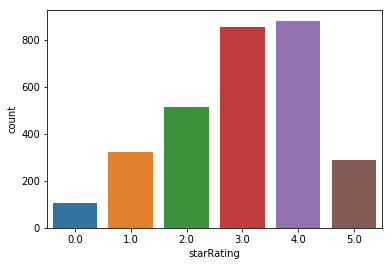

In [5]:
sns.countplot(hotel.starRating)

All booked hotels are in the city of bali

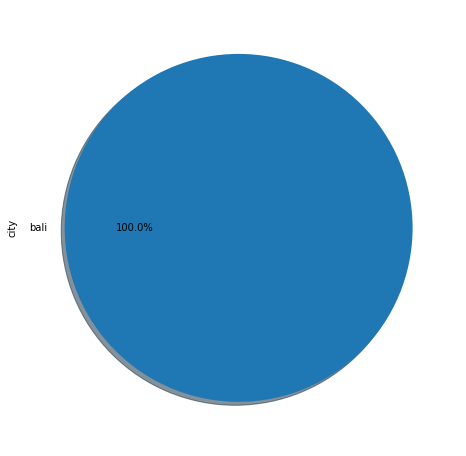

In [6]:
hotel['city'].value_counts().plot.pie(explode=[0],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Almost all hotels have free wifi

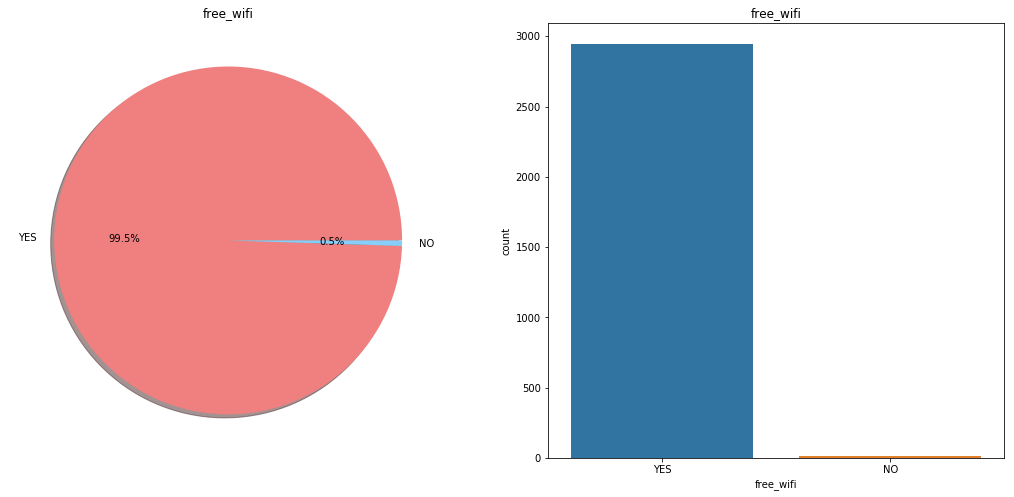

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
hotel['free_wifi'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral', 'lightskyblue'])
ax[0].set_title('free_wifi')
ax[0].set_ylabel('')
sns.countplot('free_wifi',data=hotel,ax=ax[1])
ax[1].set_title('free_wifi')
plt.show()

Many hotel reservations without pool access, which means hotel bookings are only for rest after arriving at their destination.

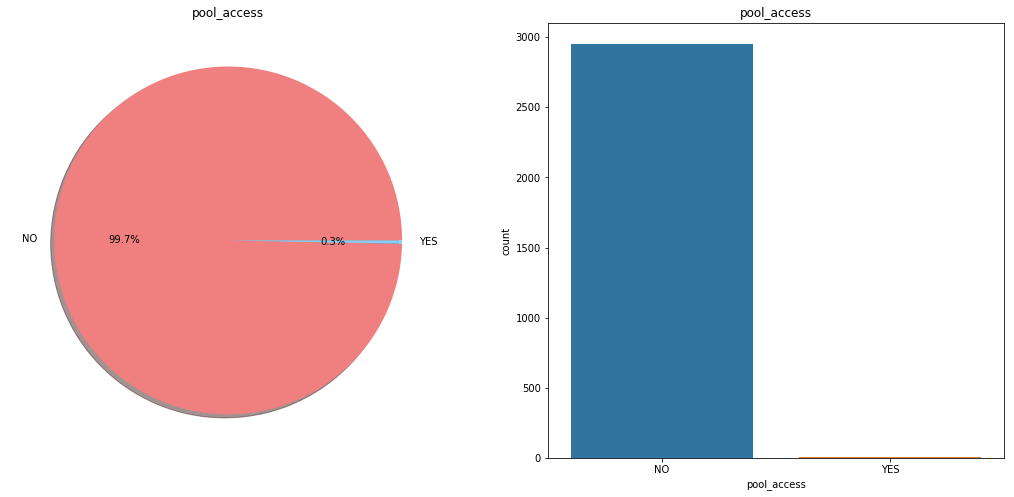

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
hotel['pool_access'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral', 'lightskyblue'])
ax[0].set_title('pool_access')
ax[0].set_ylabel('')
sns.countplot('pool_access',data=hotel,ax=ax[1])
ax[1].set_title('pool_access')
plt.show()

Around 75% of hotel orders do not include breakfast

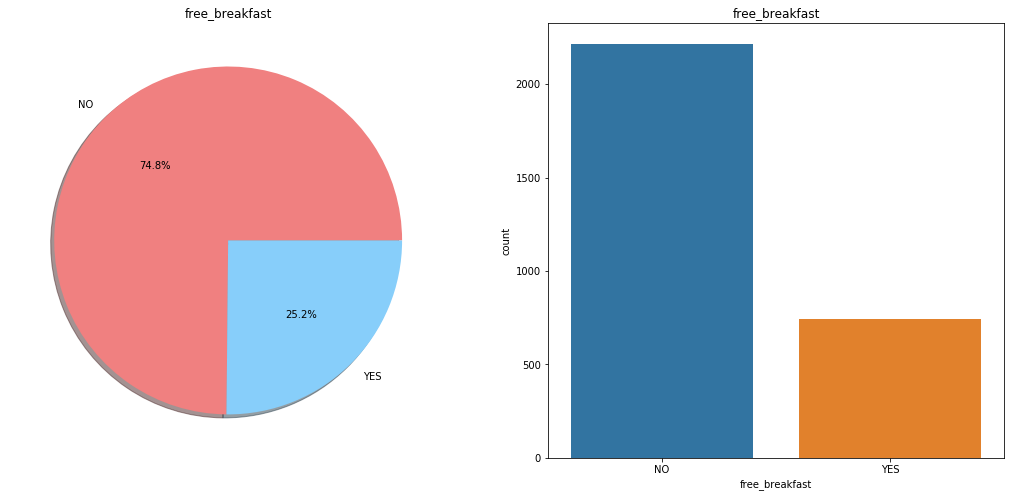

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
hotel['free_breakfast'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral', 'lightskyblue'])
ax[0].set_title('free_breakfast')
ax[0].set_ylabel('')
sns.countplot('free_breakfast',data=hotel,ax=ax[1])
ax[1].set_title('free_breakfast')
plt.show()

**Exploratory Data Analysis (EDA) of Pesawat**

Show the data of pesawat

In [10]:
pesawat.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'"
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8..."
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836...."
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'"
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,None,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0..."


Show the data type of pesawat and checking if there is null data

In [11]:
pesawat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117946 entries, 0 to 117945
Data columns (total 14 columns):
account_id              117946 non-null object
order_id                117946 non-null object
member_duration_days    117946 non-null float64
gender                  117946 non-null object
trip                    117946 non-null object
service_class           117946 non-null object
price                   117946 non-null float64
is_tx_promo             117946 non-null object
no_of_seats             117946 non-null float64
airlines_name           117946 non-null object
route                   117946 non-null object
hotel_id                117946 non-null object
visited_city            117946 non-null object
log_transaction         117946 non-null object
dtypes: float64(3), object(11)
memory usage: 12.6+ MB


The number of male and female passengers is almost same

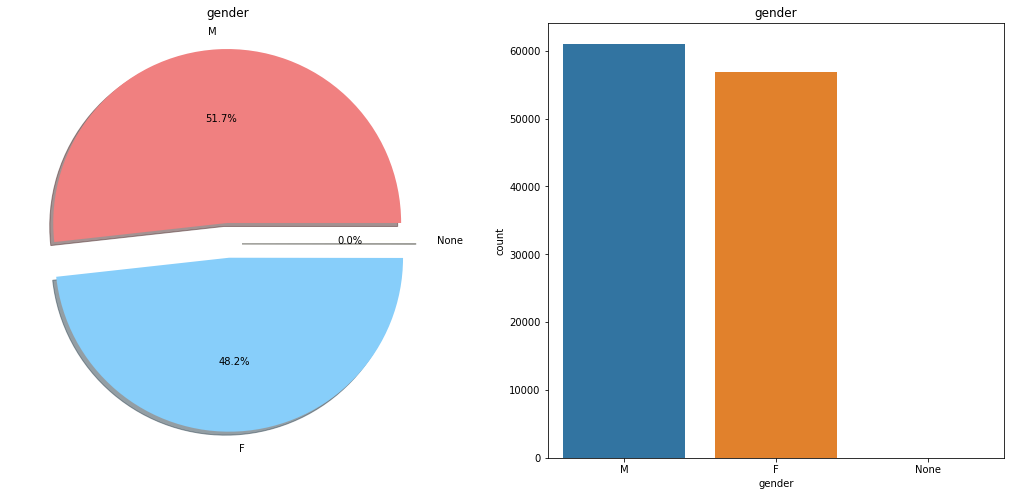

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pesawat['gender'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral', 'lightskyblue','lightyellow'])
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=pesawat,ax=ax[1])
ax[1].set_title('gender')
plt.show()

airplane travel that is much in demand is a trip

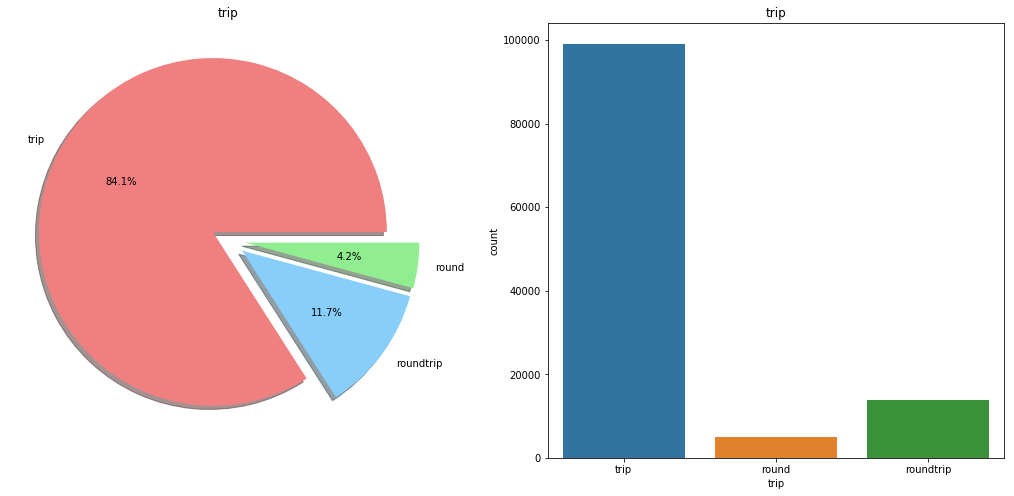

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pesawat['trip'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral', 'lightskyblue','lightgreen'])
ax[0].set_title('trip')
ax[0].set_ylabel('')
sns.countplot('trip',data=pesawat,ax=ax[1])
ax[1].set_title('trip')
plt.show()

Almost all orders prefer economy class aircraft than a business class

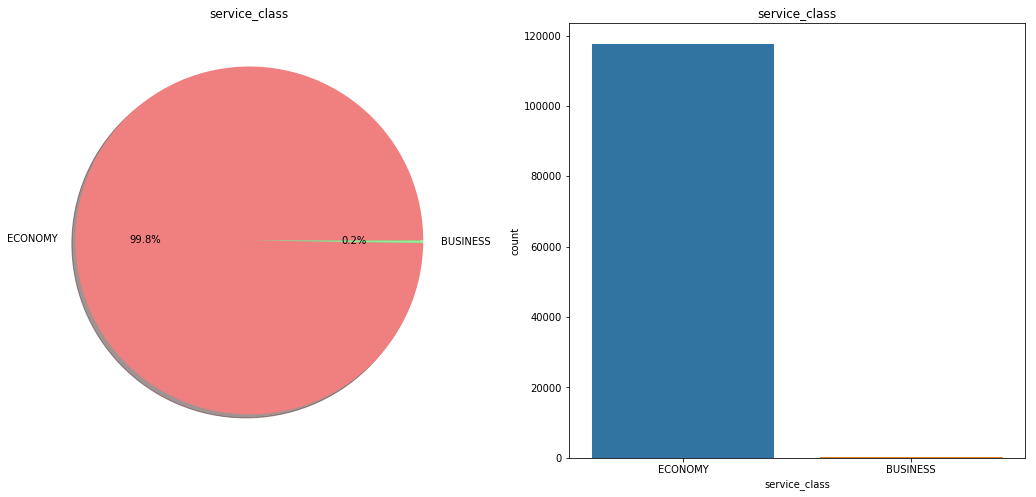

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pesawat['service_class'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral','lightgreen'])
ax[0].set_title('service_class')
ax[0].set_ylabel('')
sns.countplot('service_class',data=pesawat,ax=ax[1])
ax[1].set_title('service_class')
plt.show()

The number of orders using promotions and not using promotions is almost the same

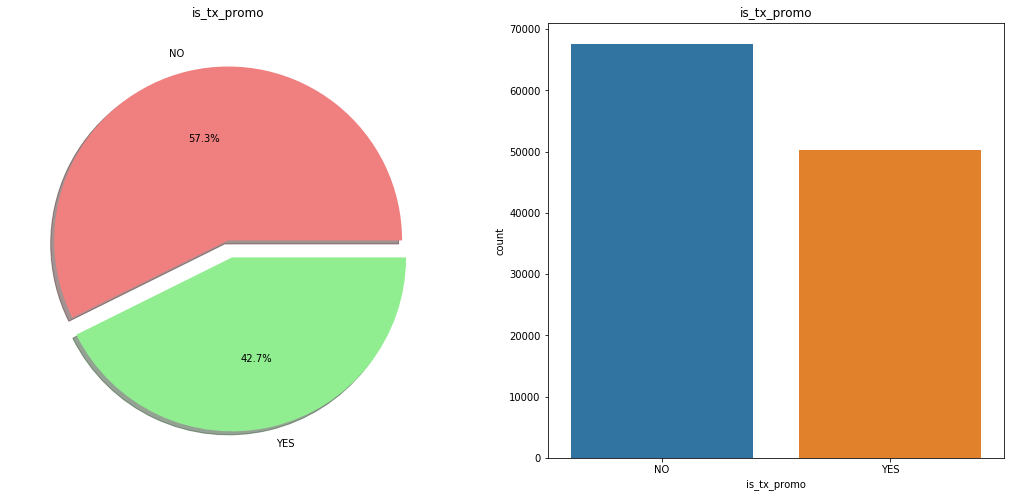

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pesawat['is_tx_promo'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral','lightgreen'])
ax[0].set_title('is_tx_promo')
ax[0].set_ylabel('')
sns.countplot('is_tx_promo',data=pesawat,ax=ax[1])
ax[1].set_title('is_tx_promo')
plt.show()

The most ordered seat number, is number 1

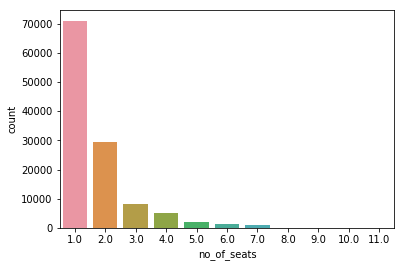

In [16]:
sns.countplot('no_of_seats',data=pesawat)
plt.show()

All travel routes are from Jakarta to Bali, this is why all hotels booked are in Bali

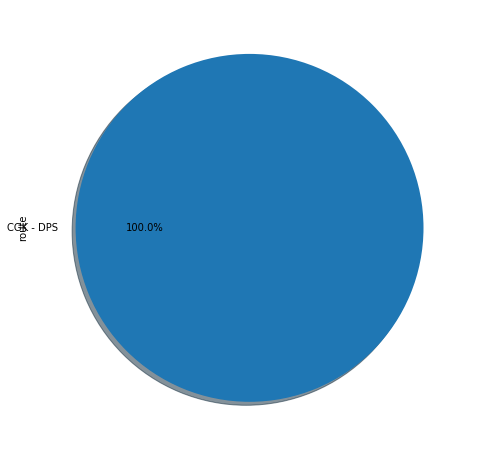

In [17]:
pesawat['route'].value_counts().plot.pie(explode=[0],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

The most visited cities are jakarta, medan and bali

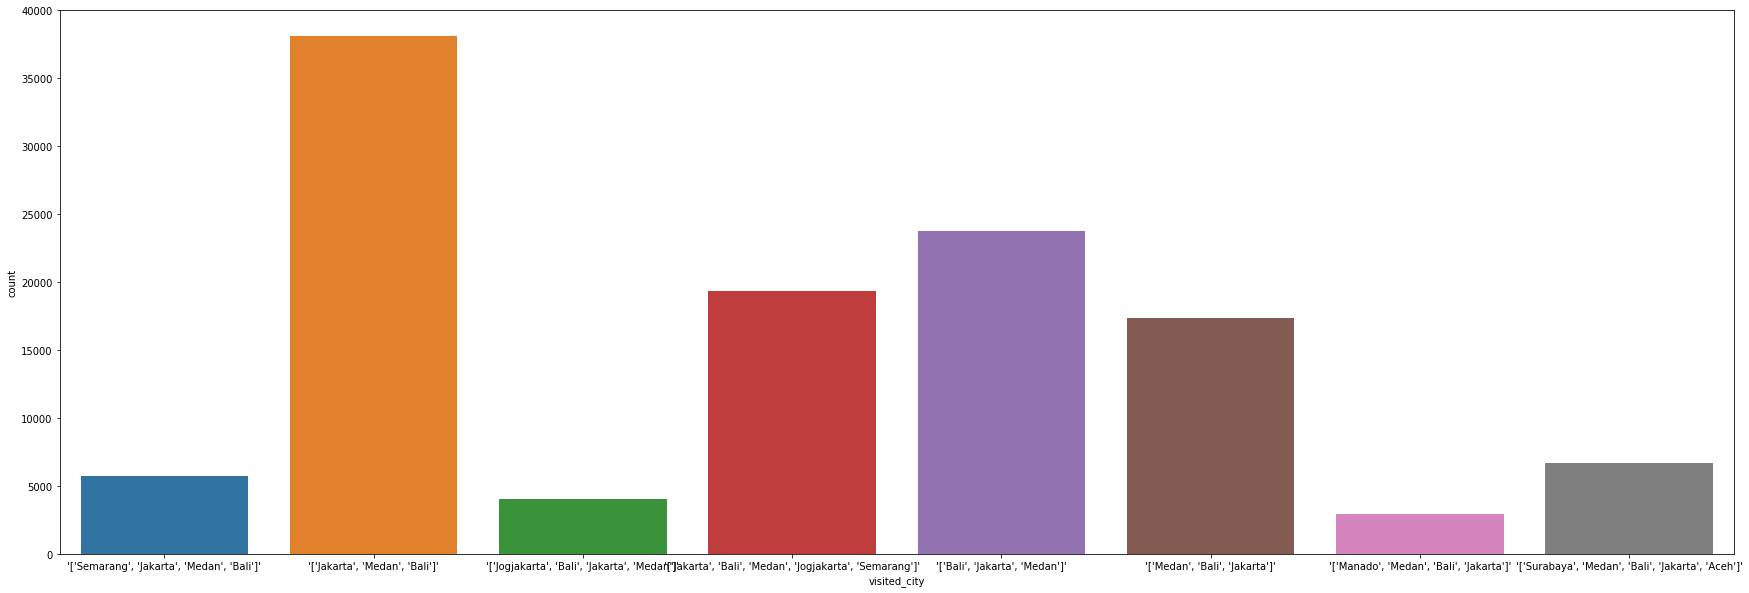

In [18]:
plt.figure(figsize=(30,10))
sns.countplot('visited_city',data=pesawat)
plt.show()

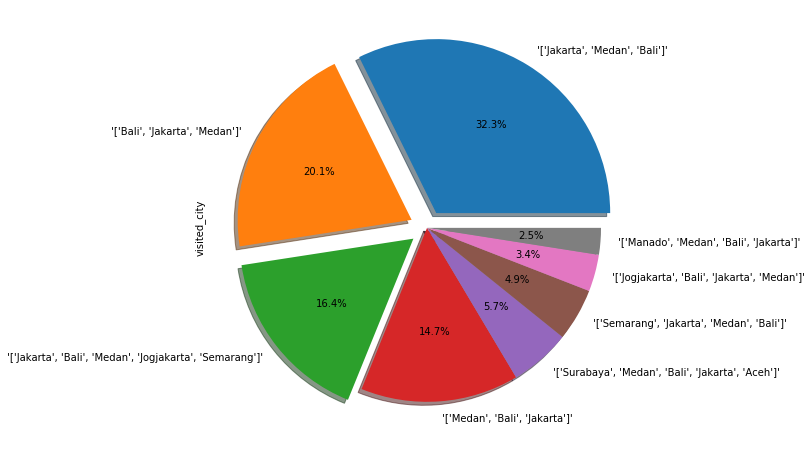

In [19]:
pesawat['visited_city'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Number of days since customer registered is almost 1500

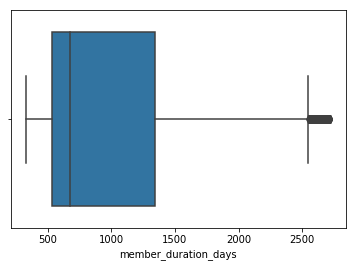

In [20]:
sns.boxplot(x=pesawat['member_duration_days'])

 # Feature Engineering

**Adds the is_cross_sell column obtained from hotel_id. If there is an id_hotel, there will be cross selling while there is no id_hotel, no cross_selling occurs**

In [21]:
pesawat['is_cross_sell']=pesawat['hotel_id']

In [22]:
pesawat.loc[pesawat['hotel_id']== 'None',['is_cross_sell']] ='NO'
pesawat.loc[pesawat['hotel_id']!= 'None',['is_cross_sell']] ='YES'

**Show the data type of pesawat and checking if there is null data**

In [23]:
pesawat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117946 entries, 0 to 117945
Data columns (total 15 columns):
account_id              117946 non-null object
order_id                117946 non-null object
member_duration_days    117946 non-null float64
gender                  117946 non-null object
trip                    117946 non-null object
service_class           117946 non-null object
price                   117946 non-null float64
is_tx_promo             117946 non-null object
no_of_seats             117946 non-null float64
airlines_name           117946 non-null object
route                   117946 non-null object
hotel_id                117946 non-null object
visited_city            117946 non-null object
log_transaction         117946 non-null object
is_cross_sell           117946 non-null object
dtypes: float64(3), object(12)
memory usage: 13.5+ MB


**Exploratory Data Analysis (EDA) of pesawat after preprocessing**

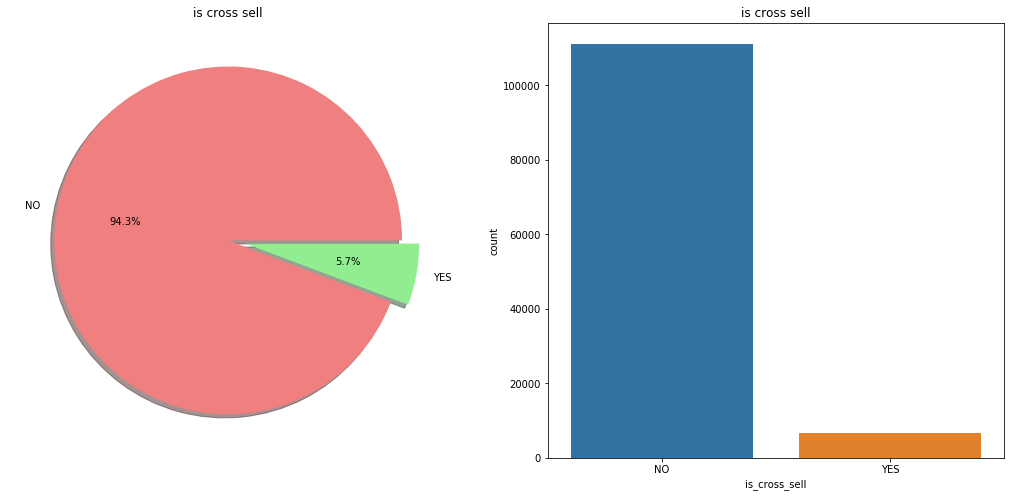

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pesawat['is_cross_sell'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors = ['lightcoral','lightgreen'])
ax[0].set_title('is cross sell')
ax[0].set_ylabel('')
sns.countplot('is_cross_sell',data=pesawat,ax=ax[1])
ax[1].set_title('is cross sell')
plt.show()

Most ticket reservations do not experience cross sell

**Change the fields in the hotel_id column with 'YES' and 'NO' in order to make it easier to create graphs**

In [25]:
pesawat.loc[pesawat['hotel_id']== 'None',['hotel_id']] ='NO'
pesawat.loc[pesawat['hotel_id']!= 'None',['hotel_id']] ='YES'

**All orders have hotel_id**

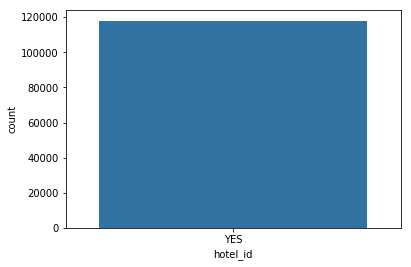

In [26]:
sns.countplot('hotel_id',data=pesawat)
plt.show()

**Change 'YES' and 'NO' on hotel_id to numbers 0 and 1 with the aim of facilitating modeling**

In [27]:
pesawat.loc[pesawat['hotel_id']== 'NO',['hotel_id']] = 0
pesawat.loc[pesawat['hotel_id']== 'YES',['hotel_id']] = 1

**Checking contains the data contained in visited_city, Gender, Service_class, is_tx_promo, airlines_name from Pesawat and Test dataset, and checking if there's any Different**

In [28]:
print('column trip\n', test.trip.value_counts(),'\n\nvisited_city\n',test.visited_city.value_counts(),
      '\n\ngender\n', test.gender.value_counts(),'\n\n\service_class\n',test.service_class.value_counts(),
      '\n\nis_tx_promo\n',test.is_tx_promo.value_counts(),'\n\nairlines_name\n',test.airlines_name.value_counts())

column trip
 trip         8399
roundtrip    1253
round         348
Name: trip, dtype: int64 

visited_city
 '['Jakarta', 'Medan', 'Bali']'                              3199
'['Bali', 'Jakarta', 'Medan']'                              2051
'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'Semarang']'    1637
'['Medan', 'Bali', 'Jakarta']'                              1492
'['Surabaya', 'Medan', 'Bali', 'Jakarta', 'Aceh']'           555
'['Semarang', 'Jakarta', 'Medan', 'Bali']'                   470
'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'                 337
'['Manado', 'Medan', 'Bali', 'Jakarta']'                     259
Name: visited_city, dtype: int64 

gender
 M    5147
F    4853
Name: gender, dtype: int64 

\service_class
 ECONOMY     9970
BUSINESS      30
Name: service_class, dtype: int64 

is_tx_promo
 NO     5326
YES    4674
Name: is_tx_promo, dtype: int64 

airlines_name
 6c483c0812c96f8ec43bb0ff76eaf716    3147
33199710eb822fbcfd0dc793f4788d30    2452
0a102015e48c1f68e121acc99f

In [29]:
print('column trip\n', pesawat.trip.value_counts(),'\n\n visited_city\n',pesawat.visited_city.value_counts(),
      '\n\ngender\n', pesawat.gender.value_counts(),'\n\nservice_class\n',pesawat.service_class.value_counts(),
      '\n\nis_tx_promo\n',pesawat.is_tx_promo.value_counts(),'\n\nairlines_name\n',
      pesawat.airlines_name.value_counts())

column trip
 trip         99148
roundtrip    13816
round         4982
Name: trip, dtype: int64 

 visited_city
 '['Jakarta', 'Medan', 'Bali']'                              38101
'['Bali', 'Jakarta', 'Medan']'                              23750
'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'Semarang']'    19367
'['Medan', 'Bali', 'Jakarta']'                              17327
'['Surabaya', 'Medan', 'Bali', 'Jakarta', 'Aceh']'           6673
'['Semarang', 'Jakarta', 'Medan', 'Bali']'                   5758
'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'                 4044
'['Manado', 'Medan', 'Bali', 'Jakarta']'                     2926
Name: visited_city, dtype: int64 

gender
 M       61036
F       56886
None       24
Name: gender, dtype: int64 

service_class
 ECONOMY     117665
BUSINESS       281
Name: service_class, dtype: int64 

is_tx_promo
 NO     67621
YES    50325
Name: is_tx_promo, dtype: int64 

airlines_name
 6c483c0812c96f8ec43bb0ff76eaf716    36669
33199710eb822fbcfd0dc793f47

**from that code we know that there are 2 airlines name that not in test data**

**Removed 2 airlines names not in test data**

In [30]:
drop1 = pesawat[pesawat['airlines_name'] == '9855a1d3de1c46526dde37c5d6fb758c'].index
drop2 = pesawat[pesawat['airlines_name'] == '6872b49542519aea7ae146e23fab5c08'].index
pesawat.drop(drop1, inplace = True)
pesawat.drop(drop2, inplace = True)

# Data Preprocessing

**Categorizing the gender, service_class, trip, is_tax_promo, visited_city, and route columns with one hot encoding**

In [31]:
gender=pd.get_dummies(pesawat['gender'],prefix='gender')
pesawat=pd.concat([pesawat,gender],axis=1)
pesawat.drop(['gender'],1, inplace=True)

gender=pd.get_dummies(test['gender'],prefix='gender')
test=pd.concat([test,gender],axis=1)
test.drop(['gender'],1, inplace=True)

In [32]:
service_class=pd.get_dummies(pesawat['service_class'],prefix='service_class')
pesawat=pd.concat([pesawat,service_class],axis=1)
pesawat.drop(['service_class'],1, inplace=True)

service_class=pd.get_dummies(test['service_class'],prefix='service_class')
test=pd.concat([test,service_class],axis=1)
test.drop(['service_class'],1, inplace=True)

In [33]:
trip=pd.get_dummies(pesawat['trip'],prefix='trip')
pesawat=pd.concat([pesawat,trip],axis=1)
pesawat.drop(['trip'],1, inplace=True)

trip=pd.get_dummies(test['trip'],prefix='trip')
test=pd.concat([test,trip],axis=1)
test.drop(['trip'],1, inplace=True)

In [34]:
is_tx_promo=pd.get_dummies(pesawat['is_tx_promo'],prefix='is_tx_promo')
pesawat=pd.concat([pesawat,is_tx_promo],axis=1)
pesawat.drop(['is_tx_promo'],1, inplace=True)

is_tx_promo=pd.get_dummies(test['is_tx_promo'],prefix='is_tx_promo')
test=pd.concat([test,is_tx_promo],axis=1)
test.drop(['is_tx_promo'],1, inplace=True)

In [35]:
visited_city=pd.get_dummies(pesawat['visited_city'],prefix='visited_city')
pesawat=pd.concat([pesawat,visited_city],axis=1)
pesawat.drop(['visited_city'],1, inplace=True)

visited_city=pd.get_dummies(test['visited_city'],prefix='visited_city')
test=pd.concat([test,visited_city],axis=1)
test.drop(['visited_city'],1, inplace=True)

In [36]:
route=pd.get_dummies(pesawat['route'],prefix='route')
pesawat=pd.concat([pesawat,route],axis=1)
pesawat.drop(['route'],1, inplace=True)

route=pd.get_dummies(test['route'],prefix='route')
test=pd.concat([test,route],axis=1)
test.drop(['route'],1, inplace=True)

Feature Engineering

**Change from the price and no of seats column to the price seats**

In [37]:
pesawat['price_seat']  = pesawat["price"] / pesawat["no_of_seats"]
pesawat['price_seat'] = pesawat['price_seat'].astype(int)
pesawat.drop(['price'],1,inplace = True)
pesawat.drop(['no_of_seats'],1,inplace = True)

test['price_seat'] = test["price"] / test["no_of_seats"]
test['price_seat'] = test['price_seat'].astype(int)
test.drop(['price'],1,inplace = True)
test.drop(['no_of_seats'],1,inplace = True)

**Exploratory Data Analysis (EDA) of price_Seat**

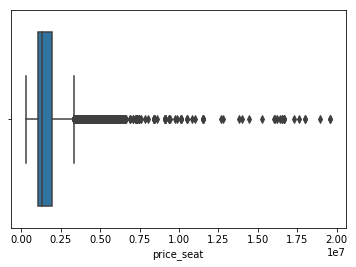

In [38]:
sns.boxplot(x=pesawat['price_seat'])

**Showing how **

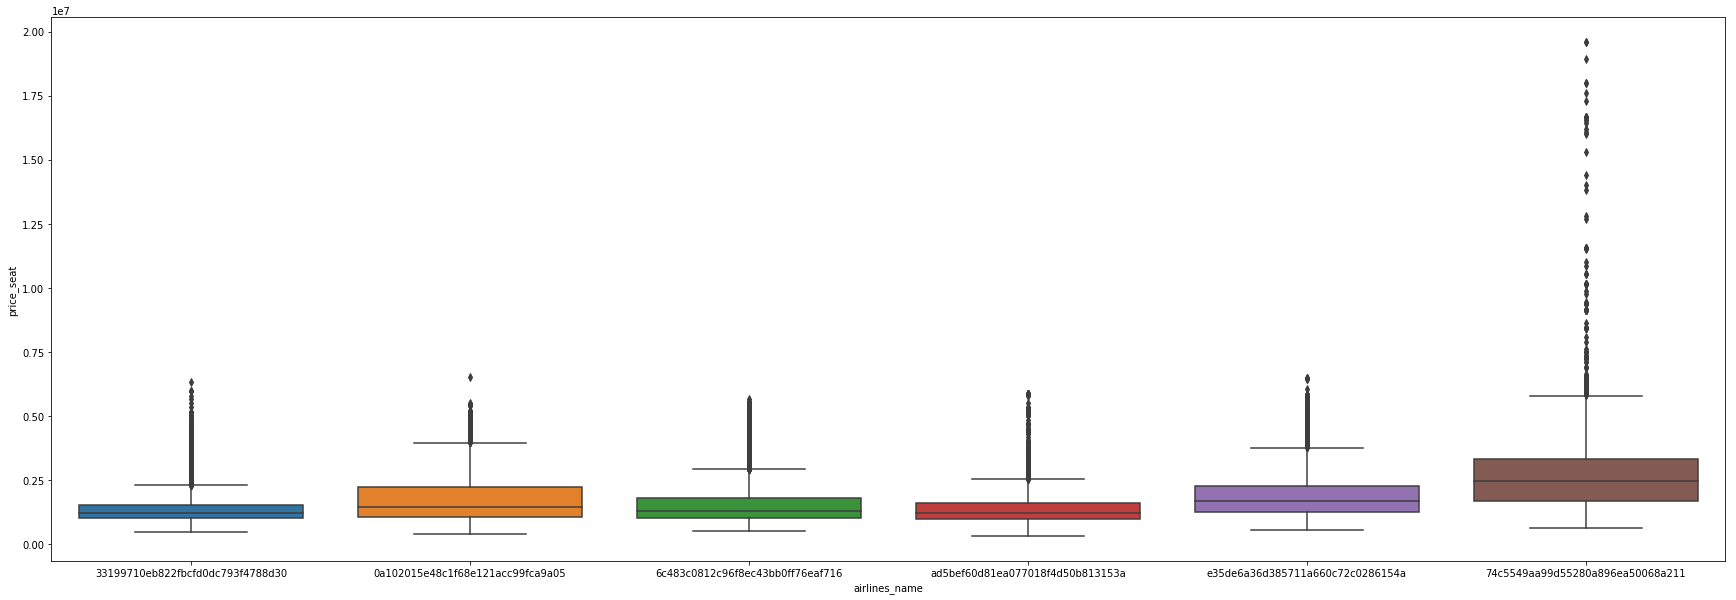

In [39]:
plt.figure(figsize=(30,10))
sns.boxplot(x='airlines_name',y='price_seat',data=pesawat)
plt.show()

**Show the data type of pesawat after feature engineering and checking if there is null data**

In [40]:
pesawat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117938 entries, 0 to 117945
Data columns (total 27 columns):
account_id                                                               117938 non-null object
order_id                                                                 117938 non-null object
member_duration_days                                                     117938 non-null float64
airlines_name                                                            117938 non-null object
hotel_id                                                                 117938 non-null int64
log_transaction                                                          117938 non-null object
is_cross_sell                                                            117938 non-null object
gender_F                                                                 117938 non-null uint8
gender_M                                                                 117938 non-null uint8
gender_None                

**Categorize the airlines name column with one hot encoding**

In [41]:
airlines_name=pd.get_dummies(pesawat['airlines_name'],prefix='airlines_name')
pesawat=pd.concat([pesawat,airlines_name],axis=1)
pesawat.drop(['airlines_name'],1, inplace=True)

airlines_name=pd.get_dummies(test['airlines_name'],prefix='airlines_name')
test=pd.concat([test,airlines_name],axis=1)
test.drop(['airlines_name'],1, inplace=True)

**Dropping UnNeeded Features**

**The 'account_id', 'order_id', 'airlines_name', 'log_transaction', 'hotel_id', and 'gender_None' columns were deleted because they had no effect on cross selling and the is_cross_sell 'column was deleted because the purpose of this modeling was to predict whether cross selling would occur. on a customer's flight transaction.**

In [42]:
X=np.array(pesawat.drop(columns=['is_cross_sell','account_id','order_id','log_transaction',
                                 'hotel_id','gender_None']))
y=pesawat['is_cross_sell'].values
test=np.array(test.drop(columns=['account_id','order_id','log_transaction']))
print ("X dataset shape : ",X.shape)
print ("y dataset shape : ",y.shape)

X dataset shape :  (117938, 26)
y dataset shape :  (117938,)


# Modelling

**Importing libraries**

In [43]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

**Split Dataset**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
print ("Train size : ",X_train.shape)
print ("Test size : ",X_test.shape)

Train size :  (88453, 26)
Test size :  (29485, 26)


# Validation

**Modeling uses the RandomForestClassifier and displays the results of the F1 score model**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators= 100)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
y_pred2 = rf_clf.predict(test)
from sklearn.metrics import f1_score
f1_model1=f1_score(y_test,pred_rf,average='weighted',labels=np.unique(pred_rf))
print("F1 score Model 1 : ",f1_model1)

F1 score Model 1 :  0.9271252965974165


**Modeling uses the GradientBoostingClassifier and displays the results of the F1 score model**

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model_1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=10, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model_1.fit(X_train,y_train)
y_pred1=model_1.predict(X_test)
from sklearn.metrics import f1_score
f1_model2=f1_score(y_test,y_pred1,average='weighted',labels=np.unique(y_pred1))
print("F1 score Model 2 : ",f1_model2)

F1 score Model 2 :  0.9133073936563134


**Modeling uses the MultinomialNB and displays the results of the F1 score model**

In [47]:
from sklearn.naive_bayes import MultinomialNB
model_2 = MultinomialNB()
model_2.fit(X_train,y_train)
pred_NB = model_2.predict(X_test)
from sklearn.metrics import f1_score
f1_model3=f1_score(y_test,pred_NB,average='weighted',labels=np.unique(pred_NB))
print("F1 score Model 3 : ",f1_model3)

F1 score Model 3 :  0.7101924758745133


**Modeling uses the KNeighborsClassifier and displays the results of the F1 score model**

In [48]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
f1_model4=f1_score(y_test,pred_knn,average='weighted',labels=np.unique(pred_knn))
print("F1 score Model 4 : ",f1_model4)

F1 score Model 4 :  0.9179802214106246


**Modeling uses the DecisionTreeClassifier and displays the results of the F1 score model**

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
f1_model5=f1_score(y_test,pred_dt,average='weighted',labels=np.unique(pred_dt))
print("F1 score Model 5 : ",f1_model5)

F1 score Model 5 :  0.9060947906637002


**Comparing the results of F1 scores in tabular form**

In [50]:
model_names=['RandomForestClasifier','GradientBoostingClasifier','MultinomialNBClassifier','KNeighborsClassifier','DecisionTreeClassifier']
F1_MODEL=[f1_model1,f1_model2,f1_model3,f1_model4,f1_model5]
d={'Modelling Algo':model_names,'F1_MODEL':F1_MODEL}   
f1_frame=pd.DataFrame(d)
f1_frame

,Modelling Algo,F1_MODEL
0,RandomForestClasifier,0.927125
1,GradientBoostingClasifier,0.913307
2,MultinomialNBClassifier,0.710192
3,KNeighborsClassifier,0.917980
4,DecisionTreeClassifier,0.906095


Exploratory Data Analysis (EDA) of F1_MODEL

**Comparing the results of F1 scores in a bar graph**

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


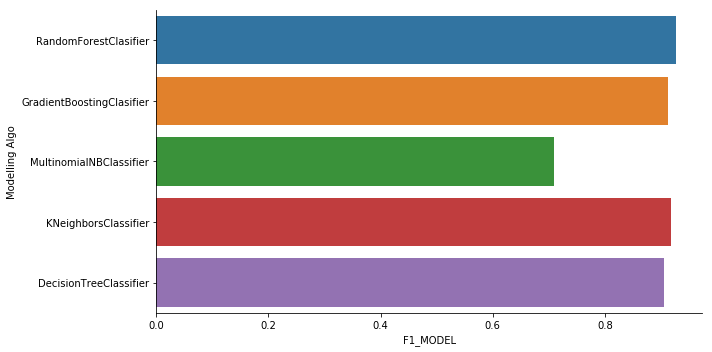

In [51]:
sns.factorplot(y='Modelling Algo',x='F1_MODEL',data=f1_frame,kind='bar',size=5,aspect=2)

**Modeling used is random forest because it produces the best F1 score and has been proven**

**Make the dataframe of test**

In [52]:
test = pd.DataFrame(test)

In [53]:
d={'order_id':test1['order_id'],'is_cross_sell':y_pred2}
ans=pd.DataFrame(d)

**Show the data of ans**

In [54]:
ans

,order_id,is_cross_sell
0,5ca64fd80a069208e3c0aa05dd580fb8,NO
1,aca60904549a8a5958fe7a642efcb534,NO
2,1771011e3adec5db9f30d15b3d439711,NO
3,6fc1b7d590c2a8c539ce56397403194d,NO
4,c1f4712f60cd758e773555690d148764,NO
...,...,...
9995,a3a06ed271bd87f0e987be26f8f200f8,NO
9996,2d4ba920b453a22e079c0888acea9bba,NO
9997,f22e17eebf2b7305906161b517391aef,NO
9998,f981b0ea71a2674216078c22f6d8ec52,NO


**convert ans to an csv file**

In [55]:
ans.to_csv('answer.csv',index=False)